In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
from matplotlib.colors import LogNorm
from glob import glob
import os
from qwind import constants
from pyagn import sed
from scipy.optimize import curve_fit

In [5]:
def luminosity(m, mdot):
    Rg = constants.G * m * constants.Ms / constants.c**2
    return mdot * Rg * constants.emissivity_constant

def accretion_rate(m, mdot):
    lumin = luminosity(m,mdot)
    acc = lumin / (0.06 * constants.c**2)
    return acc

In [6]:
GRID_FOLDER = "../grid_results_nomura"
models = glob(os.path.join(GRID_FOLDER, "*"))

In [8]:
data = pd.DataFrame.from_dict(mdot_w_list)

NameError: name 'mdot_w_list' is not defined

In [9]:
data = data.sort_values(['M','mdot'])

NameError: name 'data' is not defined

In [10]:
M_range = np.log10(data.M.unique())

NameError: name 'data' is not defined

In [11]:
mdot_range = np.log10(data.mdot.unique())

NameError: name 'data' is not defined

In [12]:
data_grid = np.array(data.mloss).reshape(len(M_range), len(mdot_range))

NameError: name 'data' is not defined

In [97]:
#data
labels = [float(item.get_text().replace("−", "-")) for item in ax.get_yticklabels()]
labels

[-1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0]

In [88]:
data['luminosity'] = luminosity(data.M, data.mdot)

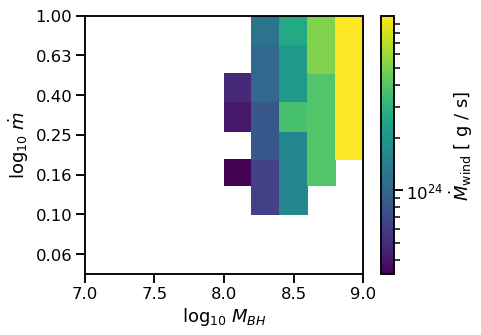

In [106]:
fig, ax = plt.subplots(figsize=(7,5))
cmap = ax.pcolormesh(M_range, mdot_range, np.transpose(data_grid), norm = LogNorm())
ax.set_xlabel(r"$\log_{10}\; M_{BH}$")
ax.set_ylabel(r"$\log_{10}\; \dot m$")
cbar = plt.colorbar(cmap, ax = ax)
cbar.ax.set_ylabel(r"$\dot M_\mathrm{wind}$ [ g / s]")
plt.tight_layout()
labels = [float(item.get_text().replace("−", "-")) for item in ax.get_yticklabels()]
labels_new = ["%.2f"%(10**label) for label in labels]
b = ax.set_yticklabels(labels_new)
plt.savefig("grid_lot_qwind_newint.png", dpi = 200, bbox_to_inches="tight")

In [74]:
lines = glob("../grid_results_qwpaper/M_1.00e+07_mdot_1.00/line_*.csv")

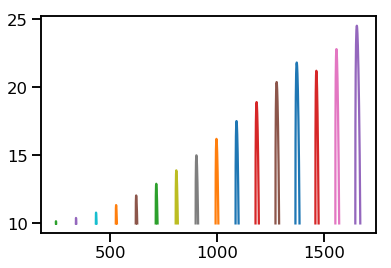

In [76]:
for line in lines:
    lin = pd.read_csv(line)
    plt.plot(lin.R, lin.Z)

In [ ]:
for mdot in [0.1, 0.3, 0.5]:
    data_plot = data[data["mdot"] == mdot]
    plt.loglog(data_plot["luminosity"], data_plot["mloss"], label = "%.1f"%mdot)
plt.ylim(1e23,1e28)
plt.xlim(1e43, 1e47)
plt.legend()

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data

In [34]:
def f(x, A, B):
    return A*x + B

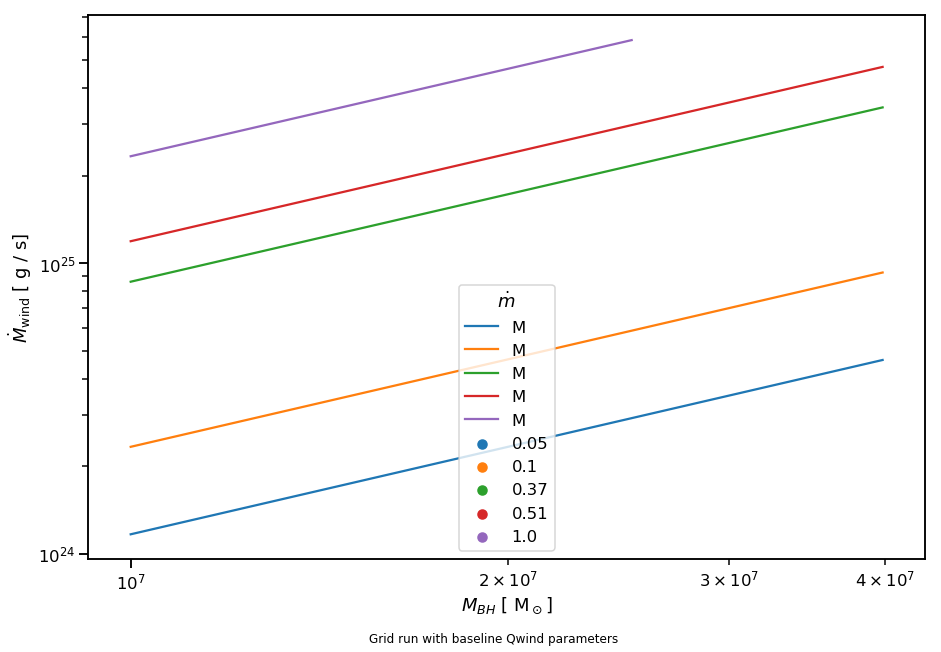

In [42]:
plt.figure(figsize=(15,10))
mdot_list = [0.05, 0.1, 0.37, 0.51, 1.0]
for mdot in mdot_list:
    data_plot = data[data.mdot == mdot]
    #data_plot = data_plot[data_plot.mloss > 0]
    #A,B = curve_fit(f, np.log10(data_plot.M), np.log10(data_plot.mloss))[0]
    #print(A)
    #plt.plot(data_plot.M, 10**f(np.log10(data_plot.M), A, B), label = mdot)
    plt.loglog(data_plot.M, accretion_rate(data_plot.M, mdot))
    plt.scatter(data_plot.M, data_plot.mloss, label = mdot)

plt.xscale('log')
plt.yscale('log')   
plt.xlabel(r"$M_{BH}$ [ M$_\odot$]")
plt.ylabel(r"$\dot M_\mathrm{wind}$ [ g / s]")
txt = "Grid run with baseline Qwind parameters"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend(title = r"$\dot m$")

In [40]:
data_plot.M

Series([], Name: M, dtype: float64)

In [41]:
data

,M,mdot,mloss
26,10000000.0,0.05,0.0
14,10000000.0,0.07,0.0
35,10000000.0,0.10,0.0
31,10000000.0,0.14,0.0
24,10000000.0,0.19,0.0
5,10000000.0,0.26,0.0
4,10000000.0,0.37,0.0
36,10000000.0,0.51,0.0
3,10000000.0,0.72,0.0
1,10000000.0,1.00,0.0
